In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import plotly as py

In [6]:
import plotly.graph_objs as go

In [7]:
from sklearn.cluster import KMeans

In [8]:
import warnings

In [9]:
import os

In [10]:
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('Mall_Customers.csv')

In [12]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.shape

(200, 5)

In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [16]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [17]:
plt.style.use('fivethirtyeight')

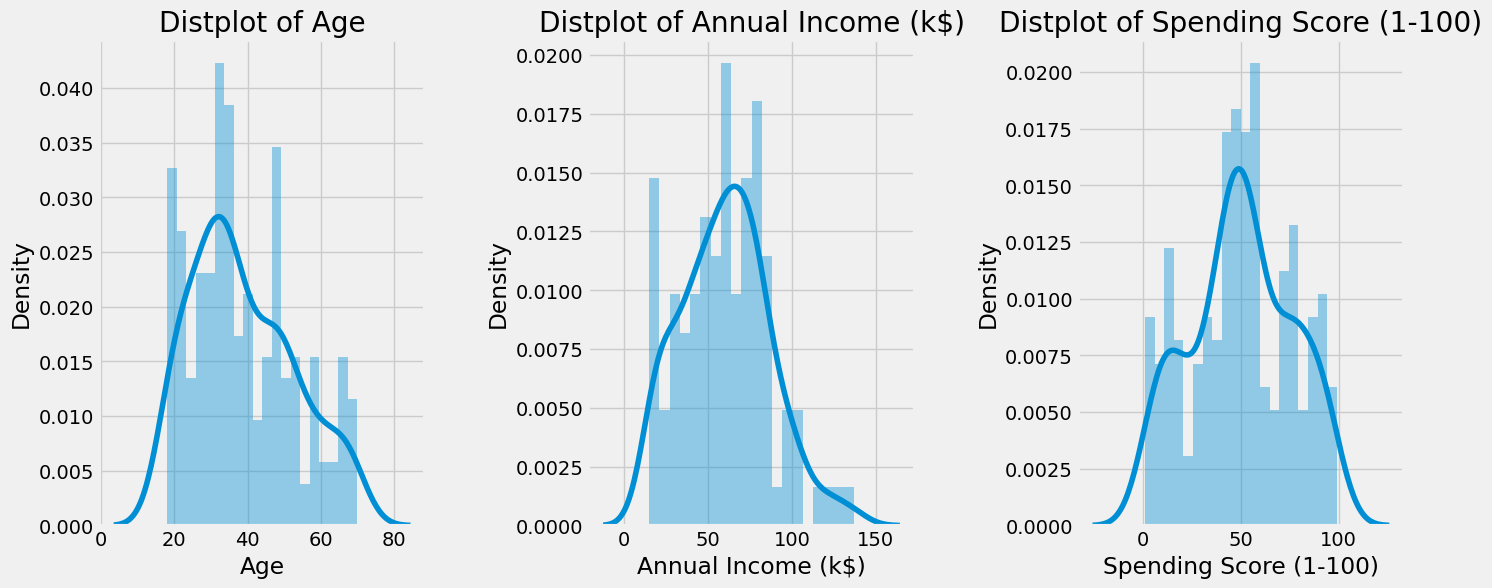

In [19]:
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

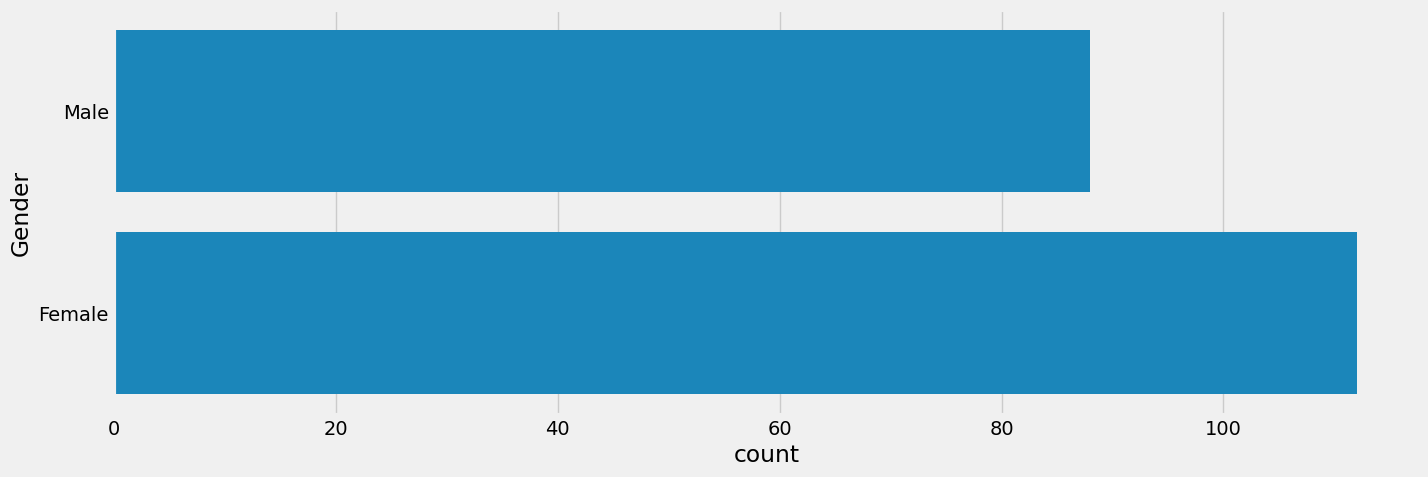

In [20]:
plt.figure(1, figsize=(15, 5))
sns.countplot(y='Gender', data=df)
plt.show()

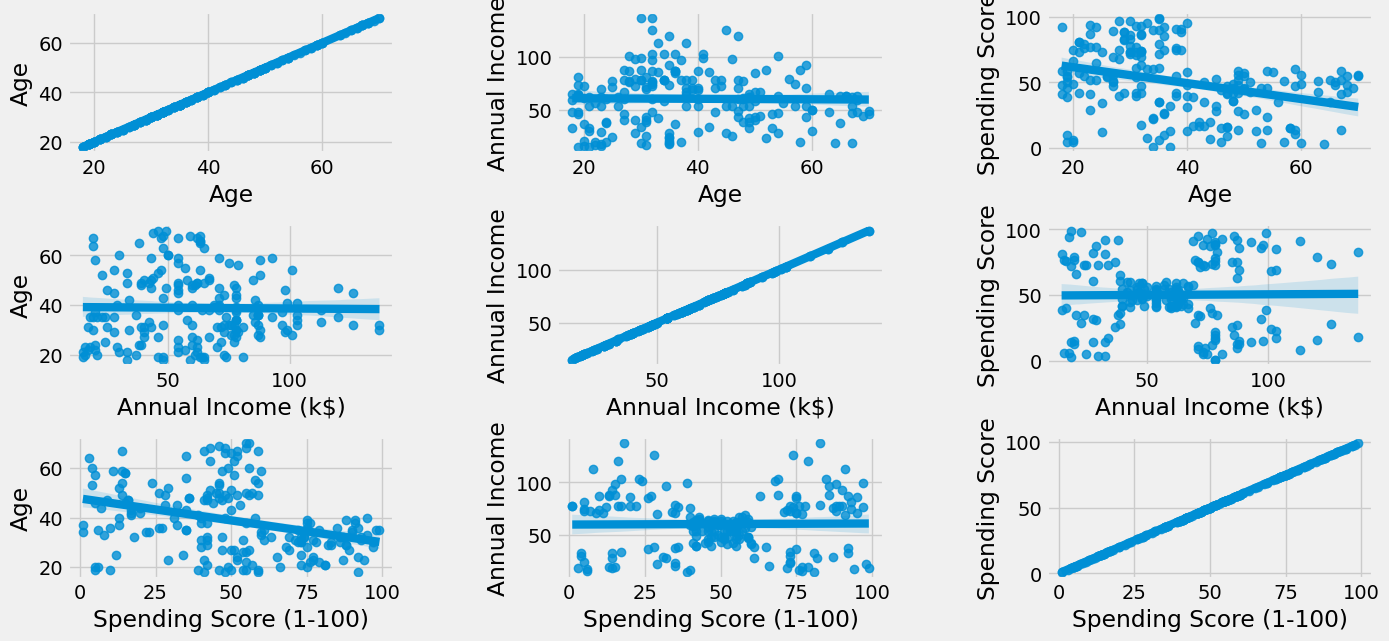

In [21]:
plt.figure(1, figsize=(15, 7))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        sns.regplot(x=x, y=y, data=df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y)
plt.show()

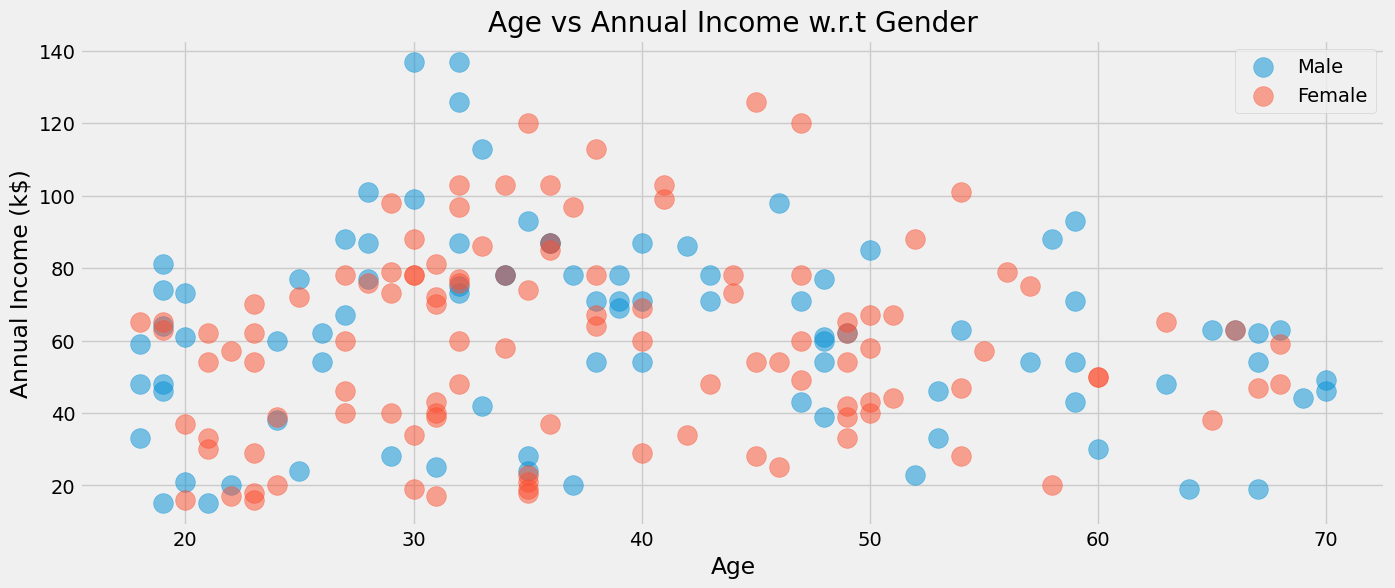

In [22]:
plt.figure(1, figsize=(15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Annual Income (k$)', data=df[df['Gender'] == gender],
                s=200, alpha=0.5, label=gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

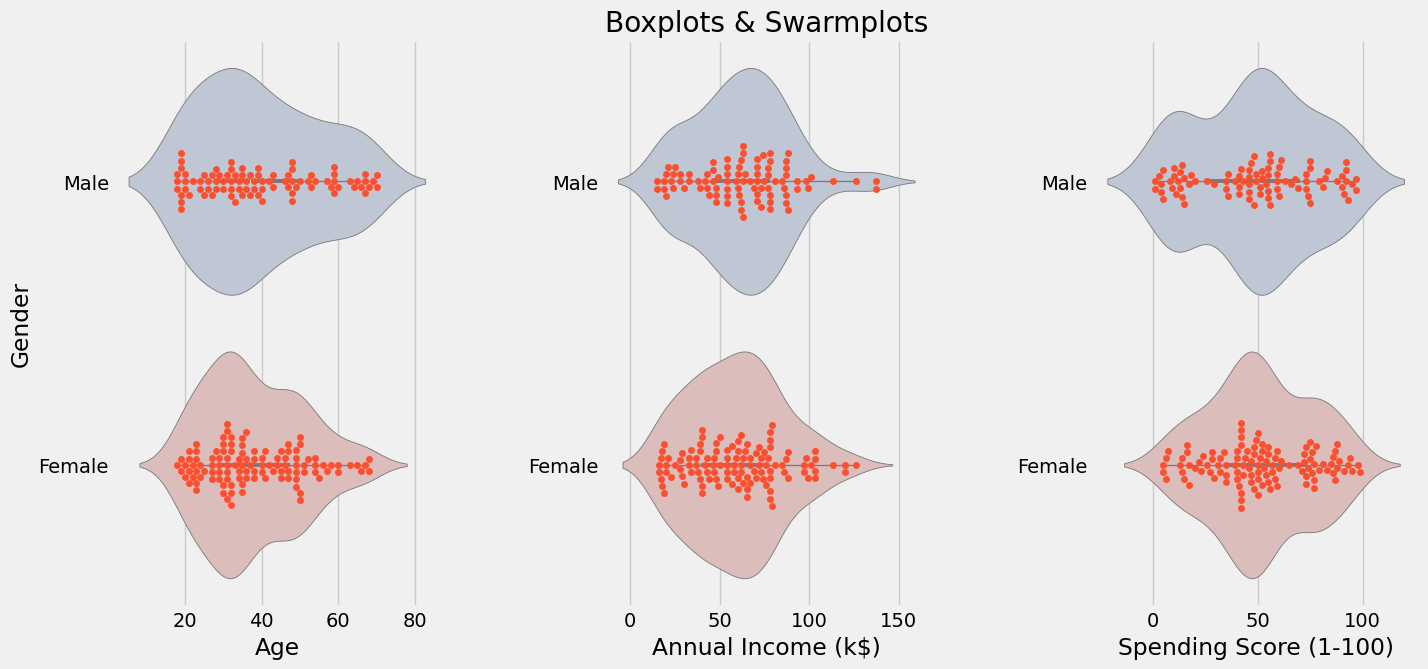

In [23]:
plt.figure(1, figsize=(15,7))
n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols, y='Gender', data=df, palette='vlag')
    sns.swarmplot(x=cols, y='Gender', data=df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Boxplots & Swarmplots' if n==2 else '')
plt.show()


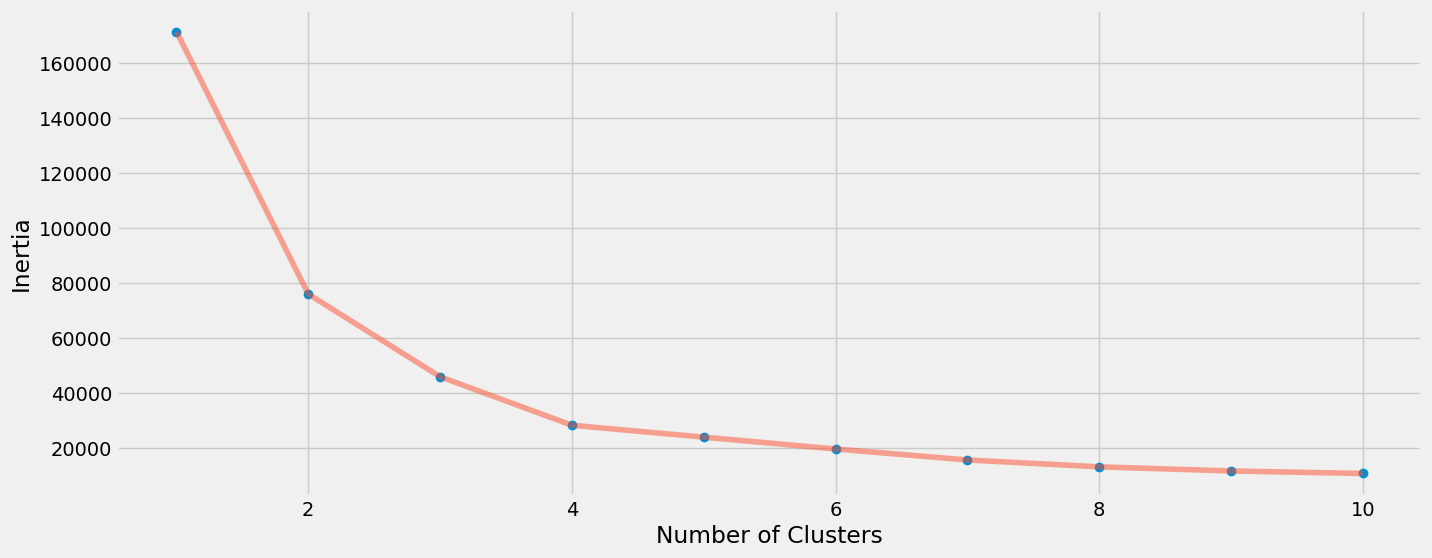

In [24]:
X1=df[['Age','Spending Score (1-100)']].iloc[:,:].values
inertia=[]
for n in range(1,11):
  algorithm=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=111,algorithm='elkan'))
  algorithm.fit(X1)
  inertia.append(algorithm.inertia_)
plt.figure(1, figsize=(15,6))
plt.plot(np.arange(1,11),inertia,'o')
plt.plot(np.arange(1,11),inertia,'-',alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [25]:
algorithm=(KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=111,algorithm='elkan'))
algorithm.fit(X1)
lables1=algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [26]:
h=0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min,y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z=algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

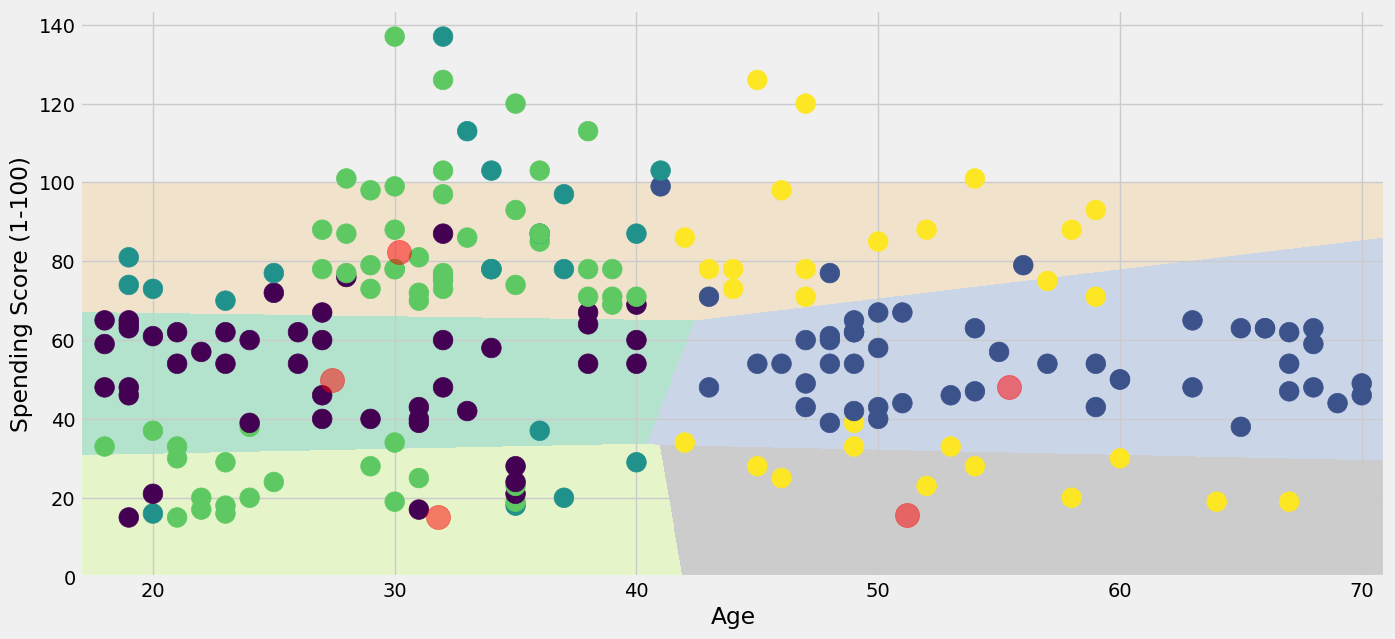

In [27]:
plt.figure(1, figsize=(15,7))
plt.clf
Z=Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')
plt.scatter(x='Age', y='Annual Income (k$)', data=df,c = lables1, s=200)
plt.scatter(x=centroids1[:,0], y=centroids1[:,1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)'),plt.xlabel('Age')
plt.show()

Text(0, 0.5, 'Inertia')

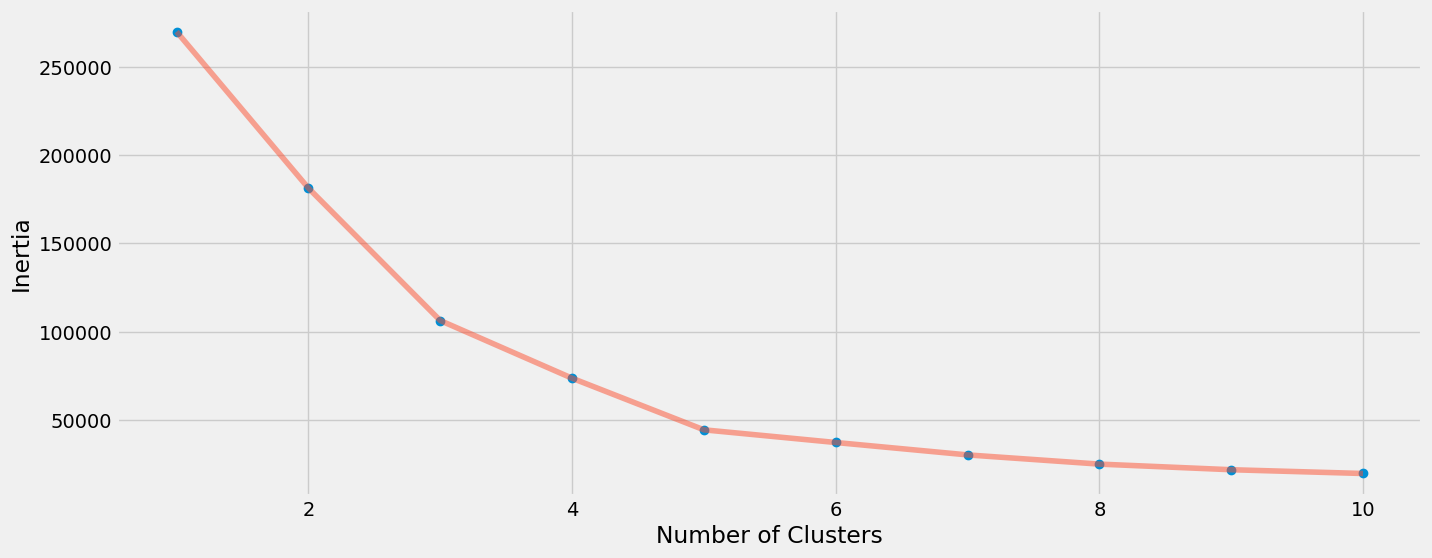

In [29]:
X2=df[['Annual Income (k$)','Spending Score (1-100)']].iloc[:,:].values
inertia=[]
for n in range(1,11):
  algorithm=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=111,algorithm='elkan'))
  algorithm.fit(X2)
  inertia.append(algorithm.inertia_)
plt.figure(1, figsize=(15,6))
plt.plot(np.arange(1,11),inertia,'o')
plt.plot(np.arange(1,11),inertia,'-',alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [31]:
algorithm = (KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=111,algorithm='elkan'))
algorithm.fit(X2)
lables2=algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [32]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx ,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2=algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

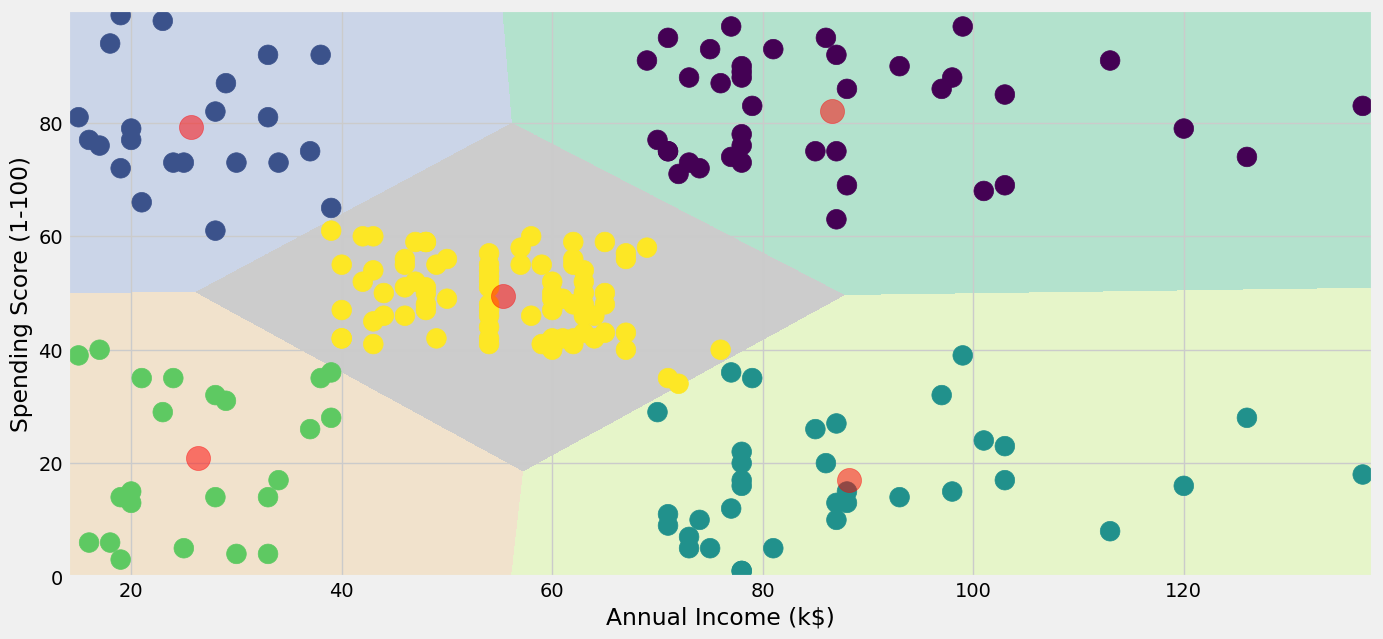

In [33]:
plt.figure(1, figsize=(15,7))
plt.clf()
Z2=Z2.reshape(xx.shape)
plt.imshow(Z2, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df,c = lables2, s=200)
plt.scatter(x=centroids2[:,0], y=centroids2[:,1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)'),plt.xlabel('Annual Income (k$)')
plt.show()

Text(0, 0.5, 'Inertia')

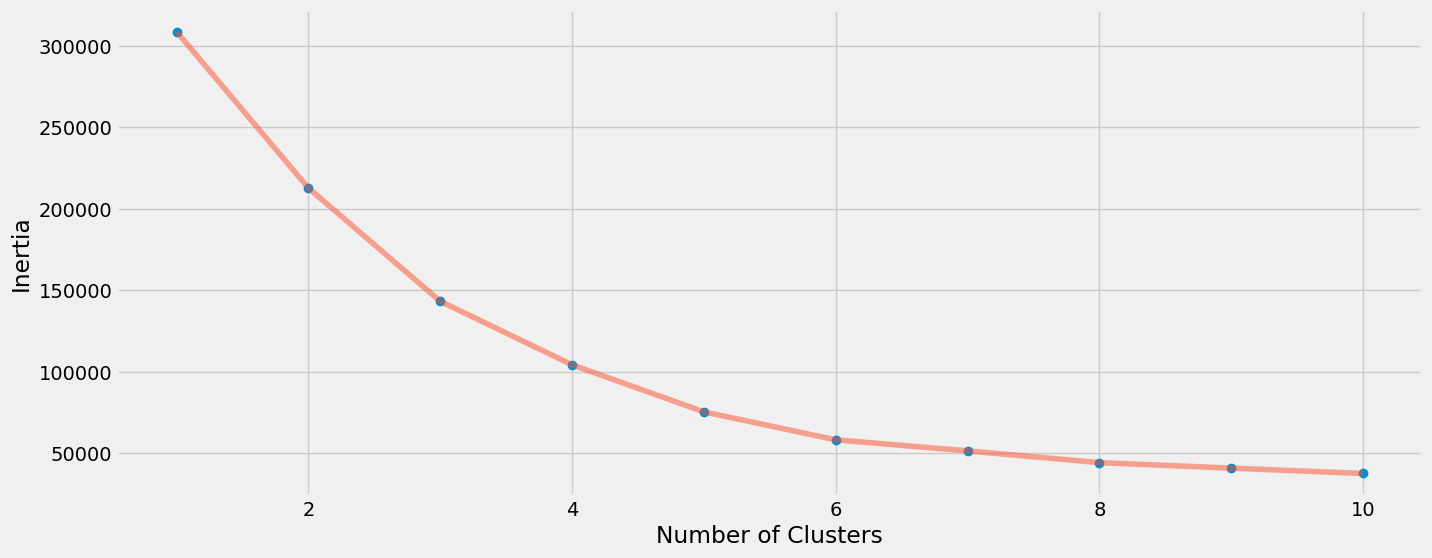

In [34]:
X3=df[['Age','Annual Income (k$)','Spending Score (1-100)']].iloc[:,:].values
inertia=[]
for n in range(1,11):
  algorithm=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=111,algorithm='elkan'))
  algorithm.fit(X3)
  inertia.append(algorithm.inertia_)
plt.figure(1, figsize=(15,6))
plt.plot(np.arange(1,11),inertia,'o')
plt.plot(np.arange(1,11),inertia,'-',alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [35]:
algorithm = (KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=111,algorithm='elkan'))
algorithm.fit(X3)
lables3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [42]:
df['label3'] = lables3  # Assign lables3 to a new column named 'label3'
trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    z=df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=df['label3'],  # Now you can access 'label3' column
        size=20,
        line=dict(
            color=df['label3'],
            width=12
        ),
        opacity=0.8
    )
)
data = [trace1]
layout = go.Layout(  # Assign go.Layout to layout instead of go.layout
    # (margin=dict(
    # l=0,
    # r=0,
    # b=0,
    # t=0
    # )
    title='Cluster',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score (1-100)'),
        zaxis=dict(title='Annual Income (k$)')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [43]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),3,2,0,1,4,label3
0,1,Male,19,15,39,3,2,0,1,4,3
1,2,Male,21,15,81,3,2,0,1,4,2
2,3,Female,20,16,6,3,2,0,1,4,3
3,4,Female,23,16,77,3,2,0,1,4,2
4,5,Female,31,17,40,3,2,0,1,4,3
5,6,Female,22,17,76,3,2,0,1,4,2
6,7,Female,35,18,6,3,2,0,1,4,3
7,8,Female,23,18,94,3,2,0,1,4,2
8,9,Male,64,19,3,3,2,0,1,4,3
9,10,Female,30,19,72,3,2,0,1,4,2


In [44]:
X=df.iloc[:,[3,4]].values

In [48]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

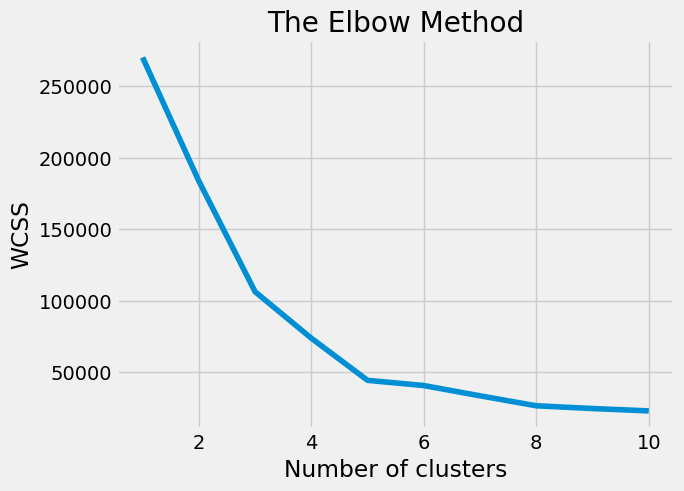

In [49]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
kmeansmodel=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeansmodel.fit_predict(X)

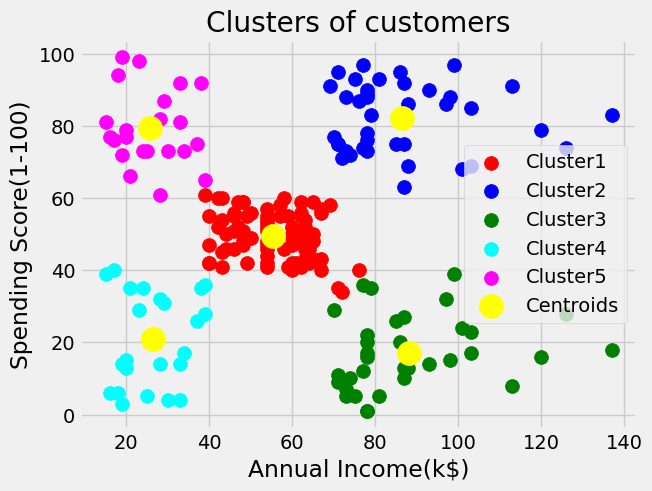

In [51]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Cluster5')
plt.scatter(kmeansmodel.cluster_centers_[:,0],kmeansmodel.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()